In [ ]:
💍 Wedding Crunchers Data Analysis
Tools: Python | Pandas | Seaborn | Matplotlib | GeoPandas
Project Objective:
To analyze wedding industry trends based on cost, location, seasonality, and guest size to extract actionable planning insights.
1. Data Collection & Cleaning  
2. Exploratory Data Analysis  
3. Cost Component Analysis  
4. Geospatial Analysis  
5. Key Insights

In [1]:
# Data Handling
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Geospatial Analysis
import geopandas as gpd
# Styling
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"]=(10,6)

In [2]:
np.random.seed(42)
n=500 # number of weddings
cities=["Mumbai", "Delhi", "Bangalore", "Hyderabad", "Pune", "Jaipur"]
seasons=["Winter", "Summer", "Monsoon", "Spring"]
data={
    "wedding_id": range(1, n+1),
    "city": np.random.choice(cities, n),
    "season": np.random.choice(seasons, n),
    "guest_count": np.random.randint(50, 800, n),
    "venue_cost": np.random.randint(200000, 1500000, n),
    "catering_cost": np.random.randint(150000, 1200000, n),
    "decor_cost": np.random.randint(100000, 800000, n),
    "photography_cost": np.random.randint(50000, 300000, n),
    "year": np.random.randint(2018, 2024, n)
}
df=pd.DataFrame(data)
# Calculate total cost
df["total_cost"]=(
    df["venue_cost"]+
    df["catering_cost"]+
    df["decor_cost"]+
    df["photography_cost"]
)
df.head()

,wedding_id,city,season,guest_count,venue_cost,catering_cost,decor_cost,photography_cost,year,total_cost
0,1,Hyderabad,Winter,409,523412,375314,352791,183669,2022,1435186
1,2,Pune,Summer,745,685417,666998,177794,246749,2020,1776958
2,3,Bangalore,Summer,330,388456,1097531,392985,52659,2022,1931631
3,4,Pune,Winter,244,755941,615757,224447,136516,2019,1732661
4,5,Pune,Monsoon,244,1406305,658062,220029,124567,2020,2408963


In [3]:
df.to_csv("C:/Users/SNEHA SINGH/wedding_crunchers_project/data/wedding_data.csv", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   wedding_id        500 non-null    int64 
 1   city              500 non-null    object
 2   season            500 non-null    object
 3   guest_count       500 non-null    int32 
 4   venue_cost        500 non-null    int32 
 5   catering_cost     500 non-null    int32 
 6   decor_cost        500 non-null    int32 
 7   photography_cost  500 non-null    int32 
 8   year              500 non-null    int32 
 9   total_cost        500 non-null    int32 
dtypes: int32(7), int64(1), object(2)
memory usage: 25.5+ KB


In [5]:
df.describe()

,wedding_id,guest_count,venue_cost,catering_cost,decor_cost,photography_cost,year,total_cost
count,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02
mean,250.500000,411.832000,8.787698e+05,6.914464e+05,461504.458000,181334.904000,2020.510000,2.213056e+06
std,144.481833,222.400656,3.620628e+05,3.092625e+05,206684.608667,74115.385724,1.720413,5.455479e+05
min,1.000000,50.000000,2.079060e+05,1.531910e+05,103754.000000,50138.000000,2018.000000,7.202760e+05
25%,125.750000,210.750000,5.780778e+05,4.014155e+05,279729.500000,116586.250000,2019.000000,1.836844e+06
50%,250.500000,399.000000,8.766710e+05,7.055585e+05,465727.000000,187828.000000,2021.000000,2.239059e+06
75%,375.250000,604.250000,1.183998e+06,9.445540e+05,643296.500000,248841.000000,2022.000000,2.617636e+06
max,500.000000,799.000000,1.498266e+06,1.198173e+06,793221.000000,299768.000000,2023.000000,3.572867e+06


In [6]:
df.isnull().sum()

wedding_id          0
city                0
season              0
guest_count         0
venue_cost          0
catering_cost       0
decor_cost          0
photography_cost    0
year                0
total_cost          0
dtype: int64

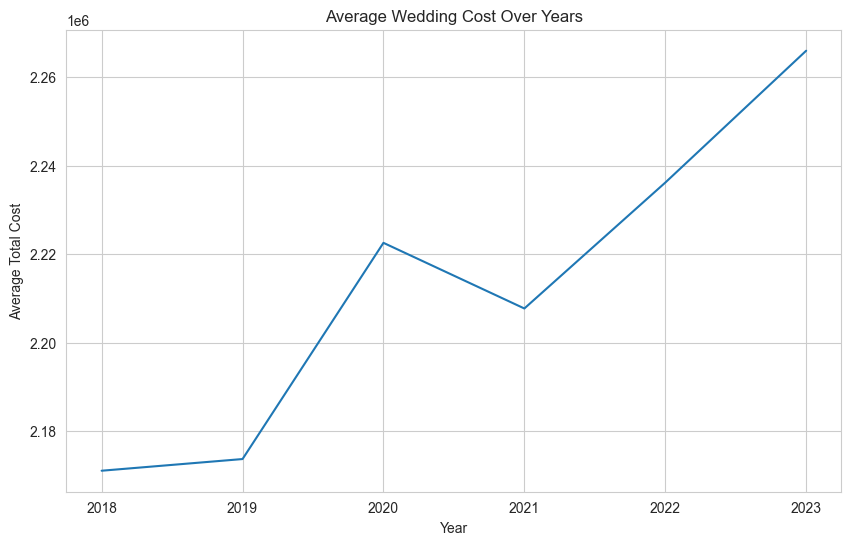

In [7]:
yearly_cost=df.groupby("year")["total_cost"].mean().reset_index()
sns.lineplot(data=yearly_cost, x="year", y="total_cost")
plt.title("Average Wedding Cost Over Years")
plt.xlabel("Year")
plt.ylabel("Average Total Cost")
plt.show()
# Insight:
# The average wedding cost shows trend variation across years.
# This helps identify inflation or seasonal industry growth..

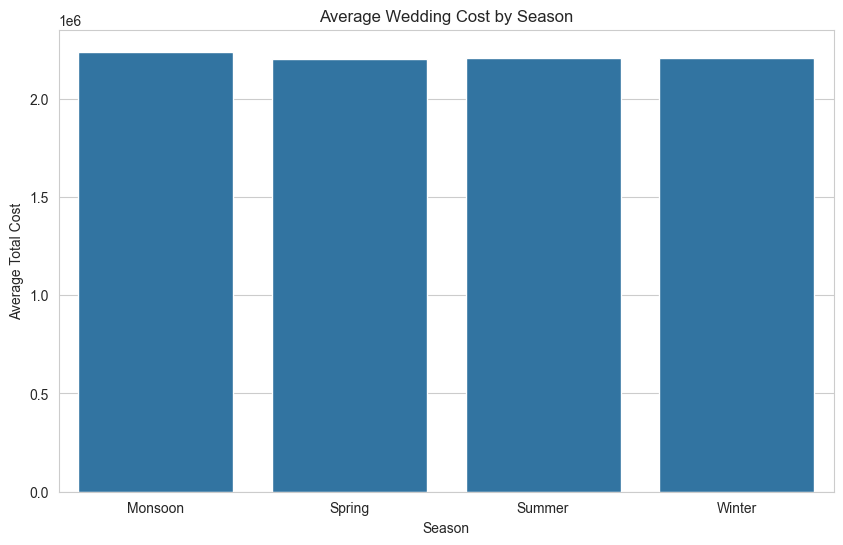

In [8]:
season_cost=df.groupby("season")["total_cost"].mean().reset_index()
sns.barplot(data=season_cost, x="season", y="total_cost")
plt.title("Average Wedding Cost by Season")
plt.xlabel("Season")
plt.ylabel("Average Total Cost")
plt.show()

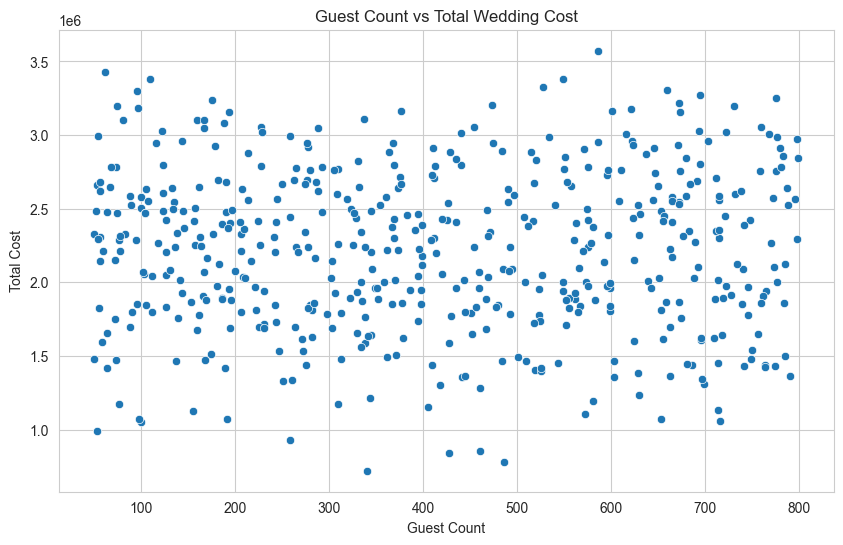

In [9]:
sns.scatterplot(data=df, x="guest_count", y="total_cost")
plt.title("Guest Count vs Total Wedding Cost")
plt.xlabel("Guest Count")
plt.ylabel("Total Cost")
plt.show()

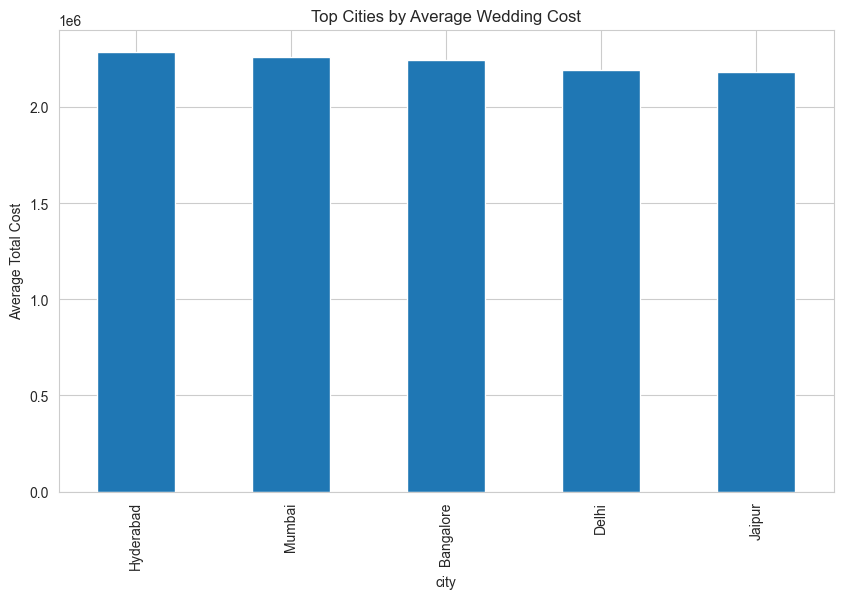

In [10]:
city_cost=df.groupby("city")["total_cost"].mean().sort_values(ascending=False)
city_cost.head().plot(kind="bar")
plt.title("Top Cities by Average Wedding Cost")
plt.ylabel("Average Total Cost")
plt.show()

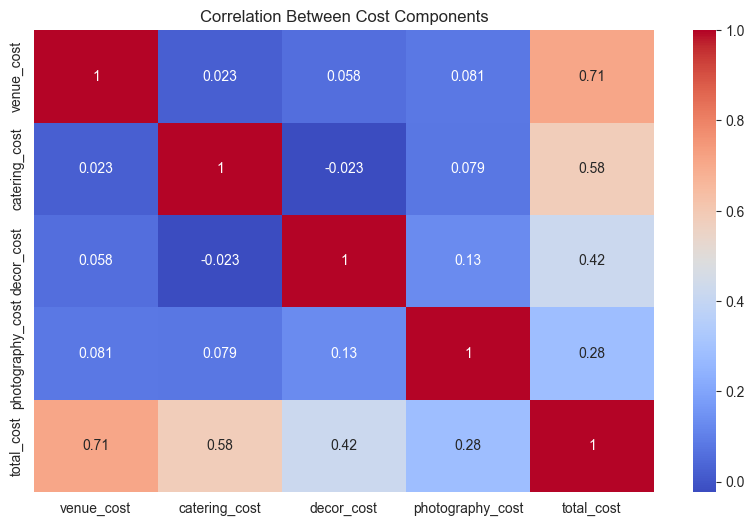

In [11]:
cost_cols=["venue_cost", "catering_cost", "decor_cost", "photography_cost", "total_cost"]
corr_matrix=df[cost_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Cost Components")
plt.show()

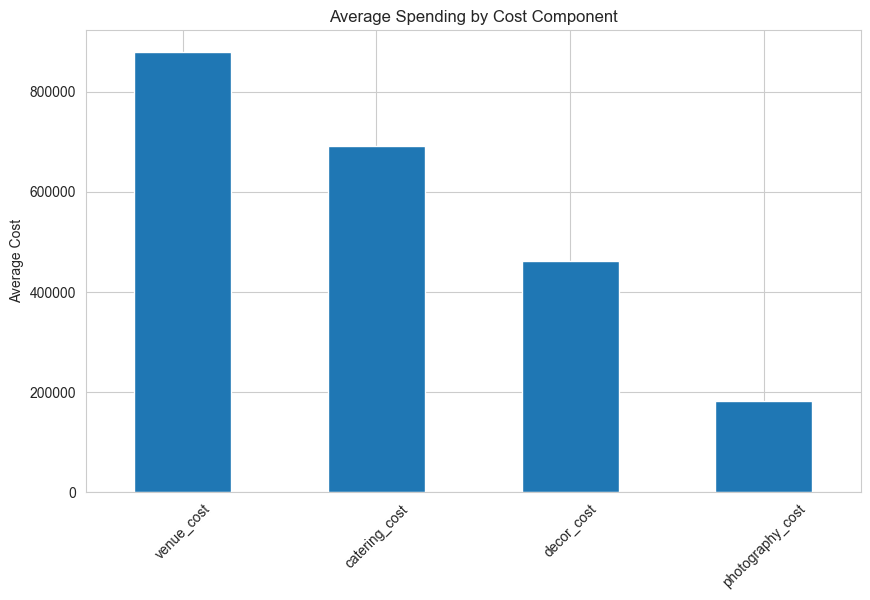

In [12]:
cost_avg=df[["venue_cost", "catering_cost", "decor_cost", "photography_cost"]].mean()
cost_avg.plot(kind="bar")
plt.title("Average Spending by Cost Component")
plt.ylabel("Average Cost")
plt.xticks(rotation=45)
plt.show()

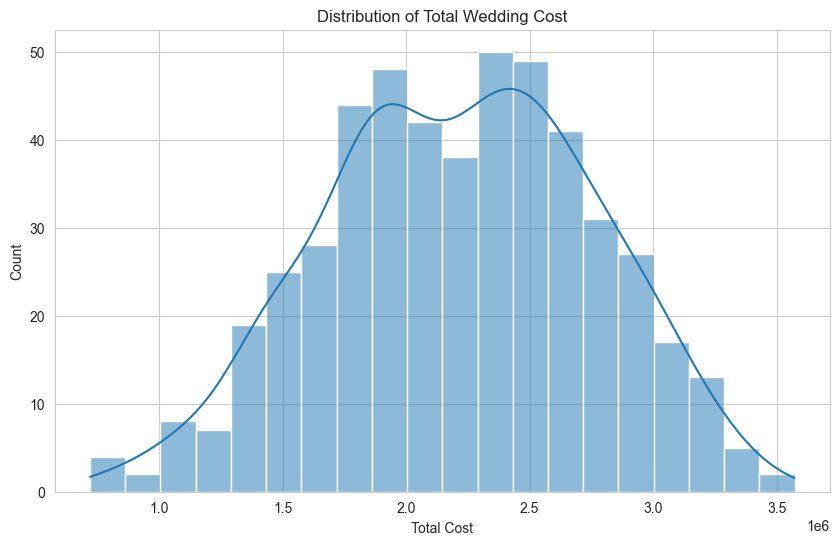

In [13]:
sns.histplot(df["total_cost"], bins=20, kde=True)
plt.title("Distribution of Total Wedding Cost")
plt.xlabel("Total Cost")
plt.show()

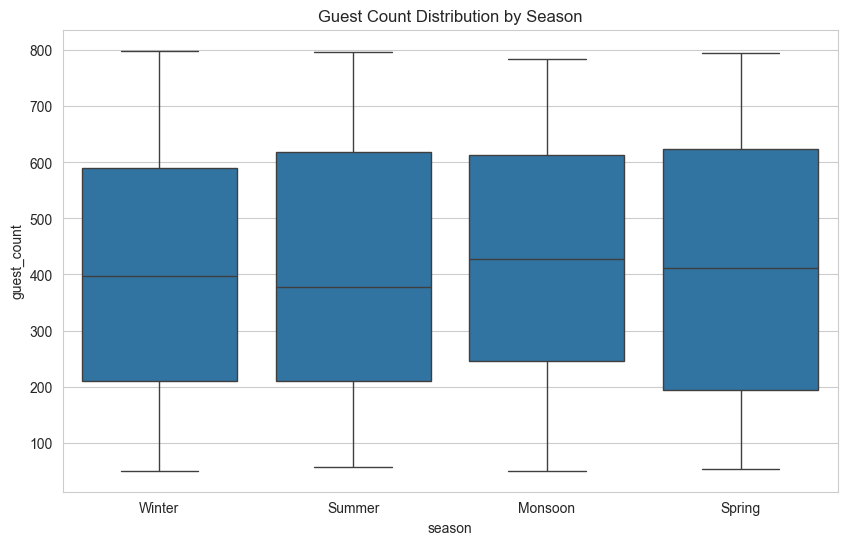

In [14]:
sns.boxplot(data=df, x="season", y="guest_count")
plt.title("Guest Count Distribution by Season")
plt.show()

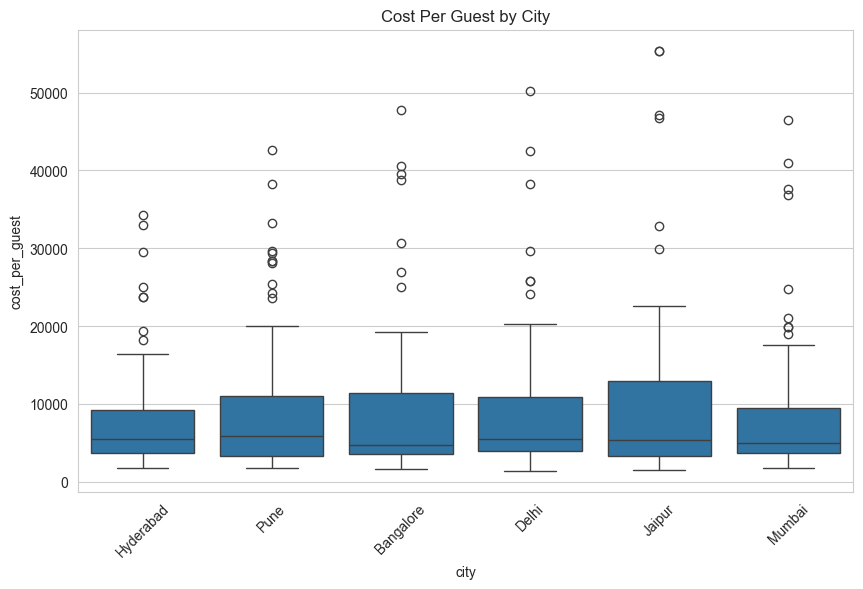

In [15]:
df["cost_per_guest"]=df["total_cost"]/df["guest_count"]
sns.boxplot(data=df, x="city", y="cost_per_guest")
plt.xticks(rotation=45)
plt.title("Cost Per Guest by City")
plt.show()

In [16]:
import geopandas as gpd

In [17]:
city_state_map={
    "Mumbai": "Maharashtra",
    "Pune": "Maharashtra",
    "Delhi": "Delhi",
    "Bangalore": "Karnataka",
    "Hyderabad": "Telangana",
    "Jaipur": "Rajasthan"
}
df["state"]=df["city"].map(city_state_map)
df.head()

,wedding_id,city,season,guest_count,venue_cost,catering_cost,decor_cost,photography_cost,year,total_cost,cost_per_guest,state
0,1,Hyderabad,Winter,409,523412,375314,352791,183669,2022,1435186,3509.012225,Telangana
1,2,Pune,Summer,745,685417,666998,177794,246749,2020,1776958,2385.178523,Maharashtra
2,3,Bangalore,Summer,330,388456,1097531,392985,52659,2022,1931631,5853.427273,Karnataka
3,4,Pune,Winter,244,755941,615757,224447,136516,2019,1732661,7101.069672,Maharashtra
4,5,Pune,Monsoon,244,1406305,658062,220029,124567,2020,2408963,9872.799180,Maharashtra


In [18]:
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
india=world[world.name=="India"]
india.plot()
plt.title("India Map")
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [ ]:
pip install geodatasets

In [ ]:
python.exe -m pip install --upgrade pip

In [ ]:
python.exe -m pip install --upgrade pip

In [ ]:
pip install --upgrade pip

In [ ]:
pip install geopandas

In [25]:
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
india=world[world.name=="India"]
india.plot()
plt.title("India Map")
plt.show()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [27]:
!pip install geodatasets

In [29]:
import geodatasets
import geopandas as gpd
world=gpd.read_file(geodatasets.get_path("naturalearth.land"))
world.head()

C:\Users\SNEHA SINGH\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [41]:
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

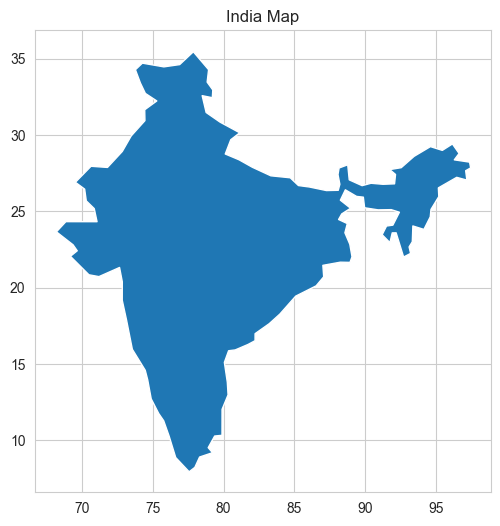

In [43]:
india=world[world["ADMIN"]=="India"]
india.plot()
plt.title("India Map")
plt.show()

In [45]:
state_cost=df.groupby("state")["total_cost"].mean().reset_index()
state_cost

,state,total_cost
0,Delhi,2.190735e+06
1,Karnataka,2.243269e+06
2,Maharashtra,2.178955e+06
3,Rajasthan,2.185235e+06
4,Telangana,2.289003e+06


In [47]:
city_coordinates = {
    "Mumbai": (19.0760, 72.8777),
    "Delhi": (28.7041, 77.1025),
    "Bangalore": (12.9716, 77.5946),
    "Hyderabad": (17.3850, 78.4867),
    "Pune": (18.5204, 73.8567),
    "Jaipur": (26.9124, 75.7873)
}
df["latitude"] = df["city"].apply(lambda x: city_coordinates[x][0])
df["longitude"] = df["city"].apply(lambda x: city_coordinates[x][1])

In [49]:
gdf=gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude)
)
gdf.head()

,wedding_id,city,season,guest_count,venue_cost,catering_cost,decor_cost,photography_cost,year,total_cost,cost_per_guest,state,latitude,longitude,geometry
0,1,Hyderabad,Winter,409,523412,375314,352791,183669,2022,1435186,3509.012225,Telangana,17.3850,78.4867,POINT (78.4867 17.385)
1,2,Pune,Summer,745,685417,666998,177794,246749,2020,1776958,2385.178523,Maharashtra,18.5204,73.8567,POINT (73.8567 18.5204)
2,3,Bangalore,Summer,330,388456,1097531,392985,52659,2022,1931631,5853.427273,Karnataka,12.9716,77.5946,POINT (77.5946 12.9716)
3,4,Pune,Winter,244,755941,615757,224447,136516,2019,1732661,7101.069672,Maharashtra,18.5204,73.8567,POINT (73.8567 18.5204)
4,5,Pune,Monsoon,244,1406305,658062,220029,124567,2020,2408963,9872.799180,Maharashtra,18.5204,73.8567,POINT (73.8567 18.5204)


In [ ]:
📌 Key Business Insights
📈 Wedding costs show noticeable variation across years.
🌤 Winter and Spring seasons tend to have higher average expenditures.
👥 Guest count has a strong positive relationship with total cost.
🏙 Metro cities like Mumbai & Delhi show higher cost per guest.
💰 Catering and Venue costs contribute the largest share of total spending.
🌍 Geospatial visualization highlights urban concentration of premium weddings.